In [172]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
#import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import  textblob
#import xgboost
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers

from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
#nltk.download('wordnet')
from textblob import Word

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
#eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

In [173]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [174]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nanu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [175]:
# dataframe bank reviews
data=pd.read_excel('BankReviews.xlsx')
data

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage
...,...,...,...,...
500,2016-02-06,1,\r\nI never write reviews but had to this time...,North American Savings Bank
501,2016-07-25,1,\r\nIt all started when Bob G ran a credit che...,North American Savings Bank
502,2017-09-27,1,\r\nWhat a horrible experience. We have excell...,North American Savings Bank
503,2017-12-24,1,"\r\nRep was extremely professional, friendly, ...",North American Savings Bank


In [176]:
data=data[['Stars','Reviews','BankName']]
data

,Stars,Reviews,BankName
0,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage
...,...,...,...
500,1,\r\nI never write reviews but had to this time...,North American Savings Bank
501,1,\r\nIt all started when Bob G ran a credit che...,North American Savings Bank
502,1,\r\nWhat a horrible experience. We have excell...,North American Savings Bank
503,1,"\r\nRep was extremely professional, friendly, ...",North American Savings Bank


In [177]:
df = data

### Basic Exploratory Analysis

#### Note: It may take some time to process the function if the data is huge`

In [178]:
import re
import nltk
nltk.download('stopwords')
eng_stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nanu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [179]:
df['Reviews'] = df['Reviews'].astype(str)
df['count_sent']=df["Reviews"].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment:f
df['count_word']=df["Reviews"].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word']=df["Reviews"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df["Reviews"].apply(lambda x: len(str(x)))

#Word density

df['word_density'] = df['count_letters'] / (df['count_word']+1)

#punctuation count
df["count_punctuations"] =df["Reviews"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["count_words_upper"] = df["Reviews"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#upper case words count
df["count_words_lower"] = df["Reviews"].apply(lambda x: len([w for w in str(x).split() if w.islower()]))

#title case words count
df["count_words_title"] = df["Reviews"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df["count_stopwords"] = df["Reviews"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df["mean_word_len"] = df["Reviews"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#Number of numeric
df['numeric'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isdigit()]))

#Number of alphanumeric
df['alphanumeric'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isalnum()]))

#Number of alphabetics
df['alphabetetics'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isalpha()]))

#Number of alphabetics
df['Spaces'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isspace()]))

#Number of Words ends with
df['words_ends_with_et'] = df['Reviews'].apply(lambda x :len([x for x in x.lower().split() if x.endswith('et')]))

#Number of Words ends with
df['words_start_with_no'] = df['Reviews'].apply(lambda x :len([x for x in x.lower().split() if x.startswith('no')]))

# Count the occurences of all words
df['wordcounts'] = df['Reviews'].apply(lambda x :dict([ [t, x.split().count(t)] for t in set(x.split()) ]))

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = Reviewsblob.ReviewsBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count']  = df['Reviews'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count']  = df['Reviews'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'pron')) 

### Calculating Sentiment analysis using Textblob module

In [180]:
df['sentiment'] = df["Reviews"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [181]:
df.head()

,Stars,Reviews,BankName,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuations,count_words_upper,...,Spaces,words_ends_with_et,words_start_with_no,wordcounts,noun_count,verb_count,adj_count,adv_count,pron_count,sentiment
0,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,1,19,19,126,6.300000,4,0,...,0,0,0,"{'refinance': 1, 'Great': 1, 'our': 1, 'you!':...",0,0,0,0,0,0.533333
1,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,1,25,23,159,6.115385,4,0,...,0,0,0,"{'you': 1, 'the': 2, 'very': 1, 'for': 2, 'is'...",0,0,0,0,0,0.453333
2,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,1,79,64,462,5.775000,8,0,...,0,0,1,"{'we': 1, 'without': 1, 'not': 1, 'that': 1, '...",0,0,0,0,0,-0.033231
3,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,1,108,78,605,5.550459,9,0,...,0,0,1,"{'LindRead': 1, 'mortgage': 1, 'time': 1, 'us'...",0,0,0,0,0,0.093740
4,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,1,59,47,341,5.683333,6,3,...,0,0,1,"{'customer': 1, 'that': 1, 'working': 1, 'the'...",0,0,0,0,0,0.125000


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 27 columns):
Stars                  505 non-null int64
Reviews                505 non-null object
BankName               505 non-null object
count_sent             505 non-null int64
count_word             505 non-null int64
count_unique_word      505 non-null int64
count_letters          505 non-null int64
word_density           505 non-null float64
count_punctuations     505 non-null int64
count_words_upper      505 non-null int64
count_words_lower      505 non-null int64
count_words_title      505 non-null int64
count_stopwords        505 non-null int64
mean_word_len          505 non-null float64
numeric                505 non-null int64
alphanumeric           505 non-null int64
alphabetetics          505 non-null int64
Spaces                 505 non-null int64
words_ends_with_et     505 non-null int64
words_start_with_no    505 non-null int64
wordcounts             505 non-null object
noun_c

In [183]:
data.Stars.value_counts()

5    410
1     95
Name: Stars, dtype: int64

In [184]:

def sentiment_score(x):
    if x >0 :
        return 'Preview'
    elif x==0:
        return 'Neutral_review'
    else:
        return 'Nreview'

In [185]:
df['review']=df['sentiment'].apply(sentiment_score)

In [186]:
df.head(2)

,Stars,Reviews,BankName,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuations,count_words_upper,...,words_ends_with_et,words_start_with_no,wordcounts,noun_count,verb_count,adj_count,adv_count,pron_count,sentiment,review
0,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,1,19,19,126,6.300000,4,0,...,0,0,"{'refinance': 1, 'Great': 1, 'our': 1, 'you!':...",0,0,0,0,0,0.533333,Preview
1,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,1,25,23,159,6.115385,4,0,...,0,0,"{'you': 1, 'the': 2, 'very': 1, 'for': 2, 'is'...",0,0,0,0,0,0.453333,Preview


In [187]:
L=df.groupby(['review']).review.count()
pd.DataFrame(L)


,review
review,
Neutral_review,4
Nreview,35
Preview,466


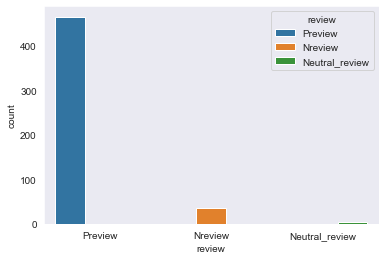

In [188]:
sns.countplot(df.review, hue="review",data =df)

### Split the data into train & Test

In [189]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
data_best_worst = data[(reviews.Stars==5) | (reviews.Stars==1)]

# define X and y
X = reviews.Reviews
y = reviews.Stars

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(378,)
(127,)
(378,)
(127,)


In [274]:
data_best_worst.head(2)

,Stars,Reviews,BankName,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuations,count_words_upper,...,words_ends_with_et,words_start_with_no,wordcounts,noun_count,verb_count,adj_count,adv_count,pron_count,sentiment,review
0,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,1,19,19,126,6.300000,4,0,...,0,0,"{'refinance': 1, 'Great': 1, 'our': 1, 'you!':...",0,0,0,0,0,0.533333,Preview
1,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,1,25,23,159,6.115385,4,0,...,0,0,"{'you': 1, 'the': 2, 'very': 1, 'for': 2, 'is'...",0,0,0,0,0,0.453333,Preview


In [191]:
data.shape

(505, 28)

In [107]:
data.head(2)

,Stars,Reviews,BankName,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuations,count_words_upper,...,words_ends_with_et,words_start_with_no,wordcounts,noun_count,verb_count,adj_count,adv_count,pron_count,sentiment,review
0,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,1,19,19,126,6.300000,4,0,...,0,0,"{'refinance': 1, 'Great': 1, 'our': 1, 'you!':...",0,0,0,0,0,0.533333,Preview
1,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,1,25,23,159,6.115385,4,0,...,0,0,"{'you': 1, 'the': 2, 'very': 1, 'for': 2, 'is'...",0,0,0,0,0,0.453333,Preview


### Creating user defined functions for clean the text and pre-process the data

In [108]:
#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [109]:
stop = set(nltk.corpus.stopwords.words('english'))

In [110]:
import string
def pre_process(text):
    #text = text.str.replace('/','')                           #Replacing the / with none
    #text = text.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space
    #text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,']", "", text)      #Replacing special character with none
    #text = re.sub(r'[0-9]+', '', text)                        #Replacing numbers with none
    #text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    #text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    #text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer
    #text = text.apply(lambda x: " ".join(stemmer_func(word) for word in x.split()))        #Stemming
    #text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    #text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(text)

### Test the functions on the sample data

In [112]:
s = 'Analytixlabs is from bagnalore, it has offices in Gurgoan, KL. It is staarted in 4Years back'

In [113]:
clean_text(s)

'analytixlabs is from bagnalore it has offices in gurgoan kl it is staarted in years back'

In [114]:
print(stop)

{'here', 'more', 'ours', 'himself', 'if', "shan't", 'this', "mustn't", 've', 'about', 'ourselves', 'ain', 'me', 'itself', 'down', 'each', "should've", 'too', 'hadn', "haven't", "isn't", 'has', 'there', "shouldn't", 'up', 'she', 'what', 'how', 'these', 'some', "you're", 'haven', 'no', 'isn', 'be', 'so', 'doing', 'few', 'off', 'but', "weren't", 'll', 'now', 'not', 'you', 'that', 'only', 'had', 'same', 'o', "couldn't", 'myself', 'hasn', 'can', 'for', 'because', 'while', 'them', 'against', 'won', 'he', "you'd", 'shan', 'are', "aren't", 'ma', 'did', "that'll", 'do', "you'll", 'such', 'my', 'herself', "needn't", 'before', 's', "hasn't", 'those', 'own', 'than', 'doesn', 'once', 'weren', 'into', 'whom', 'am', 'themselves', 'wouldn', 'we', 'just', 'having', 'over', 'very', 'her', 'is', 'our', 'yours', 'didn', 'they', 'out', 'have', 'who', 'being', 'should', 'his', 'm', 'mightn', 'why', 'i', 'mustn', "wouldn't", 'a', 'of', 'during', "it's", 'couldn', "doesn't", 'other', 'does', 'in', 'on', 'and'

In [115]:
stemmer_func = nltk.stem.snowball.SnowballStemmer("english").stem

In [116]:
s= 'Analytics is really doing good'

In [117]:
stemmer_func('really')

'realli'

In [118]:
s.split()

['Analytics', 'is', 'really', 'doing', 'good']

### Applying these functions on the Bank reviews data (both training & Testing)

In [119]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [120]:
X_train=pre_process(X_train)
X_test=pre_process(X_test)

### Vectorization (Count, Tfidf, Hashing)
        - Charter level
        - Word level
        - n-grams

In [323]:
X_train

,Reviews,sentiment
501,\r\nIt all started when Bob G ran a credit che...,0.139815
172,"\r\nGreat website, knowledgeable, responsive a...",0.183333
80,\r\nIt was a pleasure working with Robert. Fr...,0.281250
46,It all started when Bob G ran a credit check w...,0.065741
318,\r\nI agree with her 5 of 5 Star review. She w...,0.400370
...,...,...
255,"\r\nVanessa was, in a word, fantastic.\r\n\r\n...",0.354894
72,\r\nIt was fast easy and did not have to leave...,0.336111
396,\r\nA friend of mine told me that he just refi...,0.136730
235,\r\nWe worked with Jon Barrett in processing o...,0.308333


In [125]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 3 ), 
                             max_df=0.9,min_df=0.001, 
                             encoding='latin-1')
xtrain_count = count_vect.fit_transform(X_train)


### View the document term metrics

In [126]:
dtm=xtrain_count.toarray()

In [127]:
dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [128]:
count_vect.get_feature_names()

['aaron',
 'aaron anyone',
 'aaron anyone looking',
 'aaron everything',
 'aaron everything humanly',
 'aaron extremely',
 'aaron extremely help',
 'aaron fought',
 'aaron fought get',
 'aaron looking',
 'aaron looking buy',
 'aaron nasb',
 'aaron nasb team',
 'aaron professional',
 'aaron professional knowledgeable',
 'aaron told',
 'aaron told worry',
 'aarons',
 'aarons customer',
 'aarons customer service',
 'ability',
 'ability close',
 'ability close complicated',
 'ability communicate',
 'ability communicate preferred',
 'able',
 'able close',
 'able close escrow',
 'able close guaranteed',
 'able close house',
 'able close loan',
 'able completed',
 'able completed bill',
 'able enjoy',
 'able enjoy entire',
 'able experience',
 'able experience thanks',
 'able get',
 'able get done',
 'able get everything',
 'able get much',
 'able give',
 'able give list',
 'able go',
 'able go check',
 'able help',
 'able help quickly',
 'able help us',
 'able knowledgeable',
 'able knowledg

In [129]:
dtm1=pd.DataFrame(dtm)

In [130]:
dtm1.columns=count_vect.get_feature_names()

In [131]:
dtm1.head()

,aaron,aaron anyone,aaron anyone looking,aaron everything,aaron everything humanly,aaron extremely,aaron extremely help,aaron fought,aaron fought get,aaron looking,...,youi frustrated,youi frustrated himhe,zelada,zelada worked,zelada worked despite,zero,zero options,zero options said,zero point,zero point rate
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [279]:
token_count = dtm1.sum()
token_count

aaron                       14
aaron anyone                 2
aaron anyone looking         2
aaron everything             1
aaron everything humanly     1
                            ..
zero                         2
zero options                 1
zero options said            1
zero point                   1
zero point rate              1
Length: 21687, dtype: int64

In [280]:
token_count_df = pd.DataFrame({'token':token_count.index, 'count':token_count.values})
token_count_df.sort_values(by=['count'],ascending=False,inplace=True)
token_count_df.head(20)

,token,count
10938,loan,230
14244,process,174
21331,would,166
15388,read,140
19873,us,138
18926,time,131
8902,home,127
15593,recommend,115
8148,great,109
21011,work,103


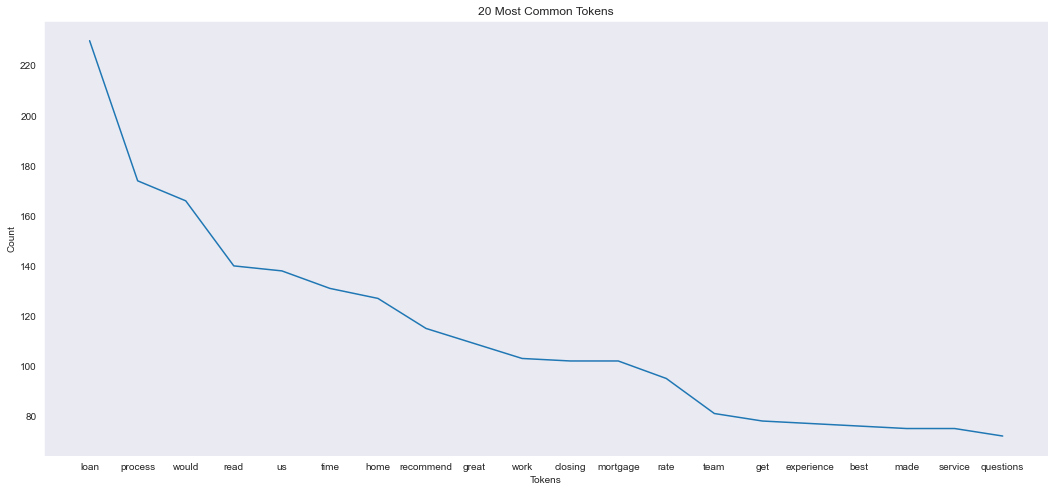

In [281]:
# 20 most common tokens
plt.figure(figsize=(18,8))
plt.plot('token','count',data=token_count_df[:20])
plt.xlabel('Tokens')
plt.ylabel('Count')
plt.title('20 Most Common Tokens')
plt.show()

In [141]:
frequency_words_wo_stop= {}
for data in data['Reviews']:
    tokens = nltk.wordpunct_tokenize(data.lower())
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1
                

In [142]:
frequency_words_wo_stop

{'great': 139,
 'job': 25,
 ',': 1135,
 'wyndham': 16,
 'capital': 12,
 '!': 222,
 'person': 17,
 'professional': 70,
 'helped': 35,
 'us': 207,
 'move': 12,
 'refinance': 70,
 'process': 253,
 'smoothly': 15,
 '.': 1976,
 'thank': 50,
 'matthew': 3,
 'richardson': 1,
 'helpful': 56,
 'find': 19,
 'correct': 1,
 'product': 10,
 'mortgage': 147,
 'much': 38,
 'excellent': 30,
 'service': 99,
 'past': 13,
 'experience': 110,
 'would': 246,
 'without': 29,
 'question': 7,
 'use': 48,
 'needed': 29,
 '!!': 24,
 'went': 70,
 'beyond': 25,
 'extra': 19,
 'mile': 8,
 'right': 28,
 'wrong': 7,
 'encountered': 7,
 'servicer': 3,
 'dealing': 14,
 'previous': 13,
 'loan': 313,
 'pulled': 4,
 'together': 8,
 'found': 16,
 'viable': 3,
 'option': 8,
 'ultimately': 5,
 'saved': 7,
 'money': 22,
 'highly': 65,
 'recommend': 156,
 'brad': 7,
 'thomka': 3,
 'team': 113,
 'needs': 27,
 'sincerest': 2,
 'thanks': 61,
 'ed': 2,
 '&': 30,
 'lind': 1,
 'beginning': 32,
 'started': 17,
 'stressful': 24,
 'ti

In [143]:
from wordcloud import WordCloud ,STOPWORDS

In [144]:
wordcloud = WordCloud(stopwords=[]).generate(' '.join(X_train.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,100))
plt.imshow(wordcloud)

### Vectorization (count, tfidf) for both train & test

In [132]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 3 ), 
                             max_df=0.9,min_df=0.001, 
                             encoding='latin-1')
xtrain_count = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)


In [133]:
dtm2=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())

In [134]:
dtm2.head(10)

,aaron,aaron anyone,aaron anyone looking,aaron everything,aaron everything humanly,aaron extremely,aaron extremely help,aaron fought,aaron fought get,aaron looking,...,youi frustrated,youi frustrated himhe,zelada,zelada worked,zelada worked despite,zero,zero options,zero options said,zero point,zero point rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.070704,0.070704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', ngram_range=(1, 3), max_df=0.9,min_df=0.001)
tfidf_vect_ngram.fit(df['Reviews'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

In [137]:
    # characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern='\w{1,}', ngram_range=(1,3), max_df=0.9,min_df=0.001)
tfidf_vect_ngram_chars.fit(df['Reviews'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test)

### Topic Models as features


In [138]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='batch', max_iter=50)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

In [139]:
# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['tim steve north necessary american savings bank savings bank american savings savings american north american',
 'make fred customer service helpful service helpful beyond make sure make sure great customer service great customer went beyond make beyond make',
 'kept well kept well informed well informed closing cost friendly great staff friendly staff friendly great work kept informed throughout process great work kept',
 'oriented professional customer oriented professional customer customer oriented customer professional marroquin anthony marroquin anthony dlj',
 'helpful done fast manner get done timely different loan closed appreciated ever',
 'great lender work lender work great lender help took call gave undivided anyone looking lender dean huge help work gave undivided looking lender work gave',
 'time home first time home teddy time home buyers home buyers dean well buyers great first time great first',
 'loan process great would us home recommend time mortgage work',
 'ever

### Create user defined function for train the models

In [145]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [147]:
#Naive Bayes
# Naive Bayes on Count Vectors and TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB  for L1, Count Vectors: ", accuracy_L1)



# Naive Bayes on Word Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count, y_test)
print("NB  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("NB  for L1, N-Gram Vectors: ", accuracy_L1)



# Naive Bayes on Character Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("NB for L1, CharLevel Vectors: ", accuracy_L1)


NB  for L1, Count Vectors:  0.84251968503937
NB  for L1, WordLevel TF-IDF:  0.9448818897637795
NB  for L1, N-Gram Vectors:  0.8031496062992126
NB for L1, CharLevel Vectors:  0.8031496062992126


In [148]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# Logistic Regression on Character Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.8188976377952756
LR  for L1, WordLevel TF-IDF:  0.889763779527559
LR  for L1, N-Gram Vectors:  0.8188976377952756
LR for L1, CharLevel Vectors:  0.8582677165354331


In [149]:
#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)



# Linear SVC on Word Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_count, y_train, xtest_count, y_test)
print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Linear SVC on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("SVC  for L1, N-Gram Vectors: ", accuracy_L1)



# Linear SVC on Character Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("SVC for L1, CharLevel Vectors: ", accuracy_L1)

SVC  for L1, Count Vectors:  0.937007874015748
SVC  for L1, WordLevel TF-IDF:  0.937007874015748
SVC  for L1, N-Gram Vectors:  0.9291338582677166
SVC for L1, CharLevel Vectors:  0.9448818897637795


In [150]:
#Random Forest
# Random Forest on Count Vectors and TF-IDF
accuracy_L1 = train_model(RandomForestClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# Random Forest on Word Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Random Forest on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# Random Forest on Character Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.8740157480314961
LR  for L1, WordLevel TF-IDF:  0.8661417322834646
LR  for L1, N-Gram Vectors:  0.8740157480314961
LR for L1, CharLevel Vectors:  0.889763779527559


In [156]:

#XGBoosting
# XGBoosting on Count Vectors and TF-IDF
accuracy_L1 = train_model(XGBClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# XGBoosting on Word Level TF IDF Vectors
accuracy_L1 = train_model(XGBClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# XGBoosting on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(XGBClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# XGBoosting on Character Level TF IDF Vectors
accuracy_L1 = train_model(XGBClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.937007874015748
LR  for L1, WordLevel TF-IDF:  0.9291338582677166
LR  for L1, N-Gram Vectors:  0.937007874015748
LR for L1, CharLevel Vectors:  0.905511811023622


In [157]:
#ANN
# ANN on Count Vectors and TF-IDF
accuracy_L1 = train_model(MLPClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# ANN on Word Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# ANN on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# ANN on Character Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.905511811023622
LR  for L1, WordLevel TF-IDF:  0.8740157480314961
LR  for L1, N-Gram Vectors:  0.968503937007874
LR for L1, CharLevel Vectors:  0.9763779527559056


In [158]:

#ANN + logistic
# ANN + logistic on Count Vectors and TF-IDF
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# ANN + logistic on Word Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# ANN + logistic on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# ANN + logistic on Character Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.8818897637795275
LR  for L1, WordLevel TF-IDF:  0.8740157480314961
LR  for L1, N-Gram Vectors:  0.8740157480314961
LR for L1, CharLevel Vectors:  0.9448818897637795


In [159]:
#OneVsRest + XGBoosting
# OneVsRest + XGBoosting on Count Vectors and TF-IDF
accuracy_L1 = train_model(OneVsRestClassifier(XGBClassifier()), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# OneVsRest + XGBoosting on Word Level TF IDF Vectors
accuracy_L1 = train_model(OneVsRestClassifier(XGBClassifier()), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# OneVsRest + XGBoosting on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(OneVsRestClassifier(XGBClassifier()), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# OneVsRest + XGBoosting on Character Level TF IDF Vectors
accuracy_L1 = train_model(OneVsRestClassifier(XGBClassifier()), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.937007874015748
LR  for L1, WordLevel TF-IDF:  0.9291338582677166
LR  for L1, N-Gram Vectors:  0.937007874015748
LR for L1, CharLevel Vectors:  0.905511811023622


### Adding Features to a Document-Term Matrix

In [193]:
# create a DataFrame that only contains the 5-star and 1-star reviews
#yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
feature_cols = ['Reviews', 'sentiment']
X = data[feature_cols]
y = data.Stars

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [194]:
# use CountVectorizer with text column only
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_df=0.9,min_df=0.001, ngram_range=(2,3))
X_train_dtm = vect.fit_transform(X_train.Reviews)
X_test_dtm = vect.transform(X_test.Reviews)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('Reviews', axis=1).shape


(378, 16904)
(127, 16904)


(378, 1)

In [195]:
# cast other feature columns to float and convert to a sparse matrix
extra = sparse.csr_matrix(X_train.drop('Reviews', axis=1).astype(float))
extra.shape

# combine sparse matrices
X_train_dtm_extra = sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

# repeat for testing set
extra = sparse.csr_matrix(X_test.drop('Reviews', axis=1).astype(float))
X_test_dtm_extra = sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(127, 16905)

In [196]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
acc_log=metrics.accuracy_score(y_test, y_pred_class)
acc_log

0.84251968503937

In [197]:
# use logistic regression with all features
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
acc_log1=metrics.accuracy_score(y_test, y_pred_class)
acc_log1

0.9448818897637795

In [198]:
# use random forest with text column only
rmf = RandomForestClassifier()
rmf.fit(X_train_dtm, y_train)
y_pred_class = rmf.predict(X_test_dtm)
acc_rmf=metrics.accuracy_score(y_test, y_pred_class)
acc_rmf

0.8661417322834646

In [199]:
# use random forest with all features
rmf = RandomForestClassifier()
rmf.fit(X_train_dtm_extra, y_train)
y_pred_class = rmf.predict(X_test_dtm_extra)
acc_rmf1=metrics.accuracy_score(y_test, y_pred_class)
acc_rmf1

0.8740157480314961

In [200]:
# use gradient boosting with text column only
gbc =  GradientBoostingClassifier()
gbc.fit(X_train_dtm, y_train)
y_pred_class = gbc.predict(X_test_dtm)
acc_grad=metrics.accuracy_score(y_test, y_pred_class)
acc_grad

0.905511811023622

In [201]:
# use gradient boosting with all features
gbc = GradientBoostingClassifier()
gbc.fit(X_train_dtm_extra, y_train)
y_pred_class = gbc.predict(X_test_dtm_extra)
acc_grad1=metrics.accuracy_score(y_test, y_pred_class)
acc_grad1

0.9291338582677166

In [202]:
# use Xgboosting with text column only
xgb =  XGBClassifier()
xgb.fit(X_train_dtm, y_train)
y_pred_class = xgb.predict(X_test_dtm)
acc_xgb=metrics.accuracy_score(y_test, y_pred_class)
acc_xgb

0.8346456692913385

In [203]:
# use Xgboosting with all features
xgb = XGBClassifier()
xgb.fit(X_train_dtm_extra, y_train)
y_pred_class = xgb.predict(X_test_dtm_extra)
acc_xgb1=metrics.accuracy_score(y_test, y_pred_class)
acc_xgb1

0.9212598425196851

In [247]:
# use ANN with text column only
mp = MLPClassifier()
mp.fit(X_train_dtm, y_train)
y_pred_class1 = mp.predict(X_test_dtm)
acc_mlp=metrics.accuracy_score(y_test, y_pred_class1)
acc_mlp

0.937007874015748

In [205]:
# use ANN with all features
mp = MLPClassifier()
mp.fit(X_train_dtm_extra, y_train)
y_pred_class = mp.predict(X_test_dtm_extra)
acc_mlp1=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp1

0.9291338582677166

In [206]:
# use ANN+logistic with text column only
mp = MLPClassifier(activation='logistic')
mp.fit(X_train_dtm, y_train)
y_pred_class = mp.predict(X_test_dtm)
acc_mlp_ln=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp_ln

0.8740157480314961

In [207]:
# use ANN+logistic with all features
mp = MLPClassifier(activation='logistic')
mp.fit(X_train_dtm_extra, y_train)
y_pred_class = mp.predict(X_test_dtm_extra)
acc_mlp_ln1=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp_ln1

0.8740157480314961

In [208]:
# use OneVsRest + XGBoosting with text column only
one_xgb = OneVsRestClassifier(XGBClassifier())
one_xgb.fit(X_train_dtm, y_train)
y_pred_class = one_xgb.predict(X_test_dtm)
acc_one_xgb=metrics.accuracy_score(y_test, y_pred_class)
acc_one_xgb

0.8346456692913385

In [209]:
# use OneVsRest + XGBoosting with all features
one_xgb = OneVsRestClassifier(XGBClassifier())
one_xgb.fit(X_train_dtm_extra, y_train)
y_pred_class = one_xgb.predict(X_test_dtm_extra)
acc_one_xgb1=metrics.accuracy_score(y_test, y_pred_class)
acc_one_xgb1

0.9212598425196851

Text(0.5, 16.0, 'Predicted label')

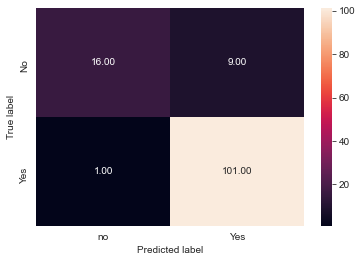

In [211]:
cm = metrics.confusion_matrix( y_test, y_pred_class)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [248]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest', 'XGBoosting','Gradient Boosting','ANN','ANN + logistic','OneVsRest + XGBoosting'],
    
    'Score': [acc_log,acc_rmf,acc_grad,acc_xgb,acc_mlp,acc_mlp_ln,acc_one_xgb]
    })

models.sort_values(by='Score', ascending=False)


,Model,Score
4,ANN,0.937008
2,XGBoosting,0.905512
5,ANN + logistic,0.874016
1,Random Forest,0.866142
0,Logistic Regression,0.842520
3,Gradient Boosting,0.834646
6,OneVsRest + XGBoosting,0.834646


In [249]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest', 'XGBoosting','Gradient Boosting','ANN','ANN + logistic','OneVsRest + XGBoosting'],
    
    'Score': [acc_log1,acc_rmf1,acc_grad1,acc_xgb1,acc_mlp1,acc_mlp_ln1,acc_one_xgb1]
    })

models.sort_values(by='Score', ascending=False)


,Model,Score
0,Logistic Regression,0.944882
2,XGBoosting,0.929134
4,ANN,0.929134
3,Gradient Boosting,0.921260
6,OneVsRest + XGBoosting,0.921260
1,Random Forest,0.874016
5,ANN + logistic,0.874016


In [282]:
y_train.value_counts()

5    308
1     70
Name: Stars, dtype: int64

In [306]:
#logreg = LogisticRegression().fit(X_train_dtm_extra, y_train)

mp = MLPClassifier().fit(X_train_dtm, y_train)

### Rating(Stars)Prediction

In [307]:
#y_pred_train = logreg.predict(X_train_dtm_extra)
#y_pred_test = logreg.predict(X_test_dtm_extra)
y_pred_train = mp.predict(X_train_dtm)
y_pred_test = mp.predict(X_test_dtm)

In [311]:
mp_train_pred = pd.DataFrame()
mp_train_pred['actual_rating'] = y_train
mp_train_pred['predicted_rating'] = y_pred_train
mp_test_pred = pd.DataFrame()
mp_test_pred['actual_rating'] = y_test
mp_test_pred['predicted_rating'] = y_pred_test

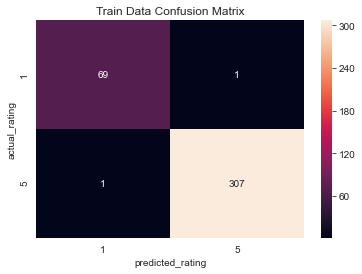

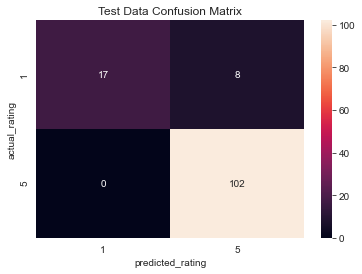

In [312]:
sns.heatmap(pd.crosstab(mp_train_pred['actual_rating'], mp_train_pred['predicted_rating']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(mp_test_pred['actual_rating'], mp_test_pred['predicted_rating']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [313]:
print("The overall accuracy score for the Trafin Data is : ", metrics.accuracy_score(mp_train_pred['actual_rating'], mp_train_pred['predicted_rating']))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(mp_test_pred['actual_rating'], mp_test_pred['predicted_rating']))

The overall accuracy score for the Trafin Data is :  0.9947089947089947
The overall accuracy score for the Test Data  is :  0.937007874015748


In [314]:
print(metrics.classification_report(mp_train_pred['actual_rating'], mp_train_pred['predicted_rating']))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99        70
           5       1.00      1.00      1.00       308

    accuracy                           0.99       378
   macro avg       0.99      0.99      0.99       378
weighted avg       0.99      0.99      0.99       378



In [315]:
print(metrics.classification_report(mp_test_pred['actual_rating'], mp_test_pred['predicted_rating']))

              precision    recall  f1-score   support

           1       1.00      0.68      0.81        25
           5       0.93      1.00      0.96       102

    accuracy                           0.94       127
   macro avg       0.96      0.84      0.89       127
weighted avg       0.94      0.94      0.93       127



### Sentiment Prediction

In [316]:
# Reviews with 5 stars can be considered as review with positive sentiement
# Reviews with 1 stars can be considered as review with negative sentiemen

In [317]:
mp_train_pred['Orignal_Sentiment'] = mp_train_pred["actual_rating"].apply(lambda x: 'Negative' if x == 1 else 'Positive')
mp_train_pred['Predicted_Sentiment'] = mp_train_pred["predicted_rating"].apply(lambda x: 'Negative' if x == 1 else 'Positive')
mp_test_pred['Orignal_Sentiment'] = mp_test_pred["actual_rating"].apply(lambda x: 'Negative' if x == 1 else 'Positive')
mp_test_pred['Predicted_Sentiment'] = mp_test_pred["predicted_rating"].apply(lambda x: 'Negative' if x == 1 else 'Positive')

In [318]:
mp_train_pred.head()

,actual_rating,predicted_rating,Orignal_Sentiment,Predicted_Sentiment
501,1,1,Negative,Negative
172,5,5,Positive,Positive
80,5,5,Positive,Positive
46,1,1,Negative,Negative
318,5,5,Positive,Positive


In [319]:
mp_test_pred.head()

,actual_rating,predicted_rating,Orignal_Sentiment,Predicted_Sentiment
307,5,5,Positive,Positive
343,5,5,Positive,Positive
47,1,1,Negative,Negative
67,5,5,Positive,Positive
361,5,5,Positive,Positive


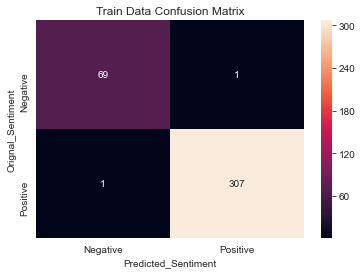

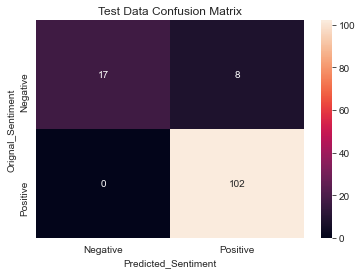

In [320]:
sns.heatmap(pd.crosstab(mp_train_pred['Orignal_Sentiment'], mp_train_pred['Predicted_Sentiment']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(mp_test_pred['Orignal_Sentiment'], mp_test_pred['Predicted_Sentiment']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [321]:
print(metrics.classification_report(mp_train_pred['Orignal_Sentiment'], mp_train_pred['Predicted_Sentiment']))

              precision    recall  f1-score   support

    Negative       0.99      0.99      0.99        70
    Positive       1.00      1.00      1.00       308

    accuracy                           0.99       378
   macro avg       0.99      0.99      0.99       378
weighted avg       0.99      0.99      0.99       378



In [322]:
print(metrics.classification_report(mp_test_pred['Orignal_Sentiment'], mp_test_pred['Predicted_Sentiment']))

              precision    recall  f1-score   support

    Negative       1.00      0.68      0.81        25
    Positive       0.93      1.00      0.96       102

    accuracy                           0.94       127
   macro avg       0.96      0.84      0.89       127
weighted avg       0.94      0.94      0.93       127

